### Task
1. Find set of all unique schools
2. For each school, create a dataframe to contain all mentees who applied there.
2. Iterate over main dataframe and add all mentees to their corresponding school's dataframe.
3. Write each school's dataframe to separate Excel sheet.
4. Save Excel sheet as single workbook.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read the Excel sheet
students = pd.read_excel("data/Ckodon Early Decision I Applicants Form (Responses).xlsx")

# preview data
students.head()

,Timestamp,Full Name,Gender,WhatsApp Number,Email Address,Select any of the following schools to which you applied Early Decision 1 (ED I)
0,2023-11-03 14:21:57.924,MICHAEL OBINNA EMMANUEL KALU,Male,0261259903,holkbn@gmail.com,"Harvard University, Cornell University, Stanfo..."
1,2023-11-03 14:22:10.127,David Junior Nintang,Male,0208360794,djnintang@gmail.com,California Institute of Technology (Caltech)
2,2023-11-03 14:22:26.174,Hubert Kingsley Ocran,Male,0550026920,kingsleyocran94@gmail.com,"Yale University, Northwestern University"
3,2023-11-03 14:22:35.999,Kenrich Nii Nakai Nettey,Male,+233548635346,kennyniinettey11@gmail.com,Washington University in St. Louis
4,2023-11-03 14:22:36.897,Daniel Nmecha,Male,+2349034787021,dannynmecha@gmail.com,"Yale University, Harvard University, Princeton..."


In [24]:
# create a dictionary with dataframes of applicants to each school
school_applicants = {}

# extract school of each student and add student to dictionary based on school.
for row in students.index:
    student = students.loc[row]
    student_schools = list(map(str.strip, student["Select any of the following schools to which you applied Early Decision 1 (ED I)"].split(",")))
    for school in student_schools:
        # check if school does not exist in dictionary
        if school not in school_applicants:
            school_applicants[school] = pd.DataFrame(columns=students.columns)  # create entry for school in dictionary
        
        # add current student's row to dataframe for corresponding school
        school_applicants[school].loc[len(school_applicants[school])] = list(student)
        

In [27]:
# write schools to Excel sheets
with pd.ExcelWriter("./data/Sorted Ckodon Early Decision I Applicants.xlsx", mode = "w") as writer:
    for school in school_applicants:
        school_applicants[school].to_excel(writer, sheet_name=school, index=False)


/Users/francisohara/DataspellProjects/ckodon-bootcamp-analysis-3/venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


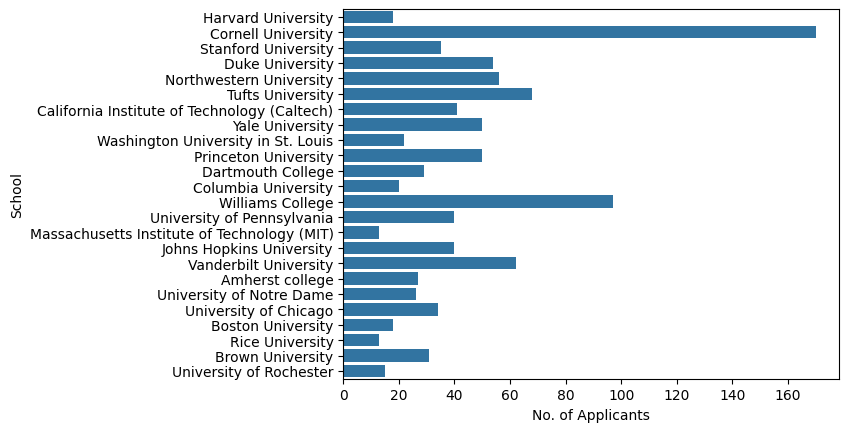

In [34]:
# create dataframe of schools and number of applicants per school
applicants_per_school = pd.DataFrame({"School": school_applicants.keys(), "No. of Applicants": [len(applicants) for applicants in school_applicants.values()]})

# create bar graph of school applicant distribution
applicant_distribution_graph = sns.barplot(applicants_per_school, y="School", x="No. of Applicants")